# Bandwidth extension (BWE)

> Different hardware and software use a range of different sampling rates such that often, the sound reproduction side could offer a higher sampling rate than what the recorded signal has. The local hardware is thus better than the sound received. The bandwidth of the output sound thus corresponds to the recorded sound, which is lower in quality than what the hardware can reproduce. Such bandlimitation makes the output sound dull and darker than the original (see [Waveform/Sampling rate](content:samplingrate) for audio examples). The objective here is to mend such degradations in audio quality, to restore the audio to best possible quality.

**Bandwidth extension (BWE)** or sometimes referred to as **audio super resolution** {cite:p}`kuleshov2017audiosuperres` due to its image processing counterpart, corresponds to the task of mapping a signal $s_l$ with sample rate $fs_l$ to another signal $s_h$ with sample rate $fs_h$. Typically, $fs_h$ is $r$ times bigger than $fs_l$ where $r$ is an integer number and is known as the **downsampling factor**:

$\frac{fs_h}{fs_l} = r$

In BWE $\hat{s}_h$, the estimate of $s_h$, should ideally be perceived as if it was originally digitised at $fs_h$, thus, being as close as possible to $s_h$ itself. If no additional information other than $s_l$ is known, this problem can also be found in literature as **blind bandwidth extension (BBWE)** {cite:p}`schmidt2018bbwe`. It can be formulated as follows:

$\hat{s}_h=f\left(W, s_l\right)$

Where $W$ is an arbitrary set of parameters. It is important to observe that the aforementioned relationship assumes that $\hat{s}_h$ can be estimated from $s_l$. This may not be possible for all types of signals and because of this, BWE can be considered an overdetermined problem since several $\hat{s}_h$ candidates can be fabricated for any given $s_l$. For a particular case (e.g. speech signals) some candidates will be perceptually more appropriate than others, therefore perceptual criteria is highly important in choosing the right estimate. Furthermore, several questions remain open such as *how many parameters should $W$ contain?* or *how many samples in the neighbourhood of a given sample are necessary to produce an optimal estimate $\hat{s}_h$?* Widely used methods in speech processing such as [linear prediction](../Representations/Linear_prediction.md) exploit the fact that adjacent speech signal samples are correlated and given sufficient sample rate, they are not expected to change abruptly. This factor is advantageous for the case of speech BWE since it may contribute to form a criterion under which more appropriate candidates can be separated from the least appropriate ones.  

The following plots show first an audio recording sampled at 48kHz and then the same audio but previously downsampled to 16kHz.

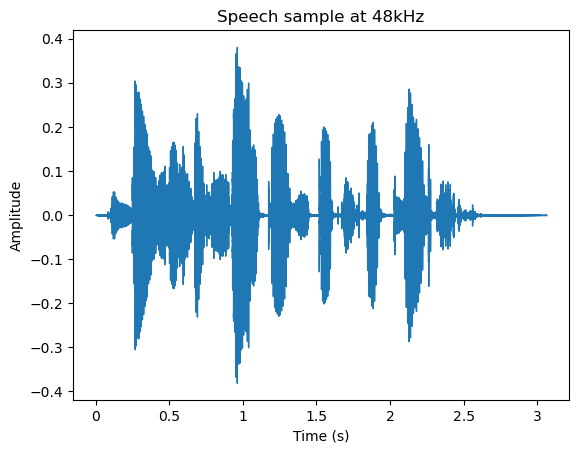

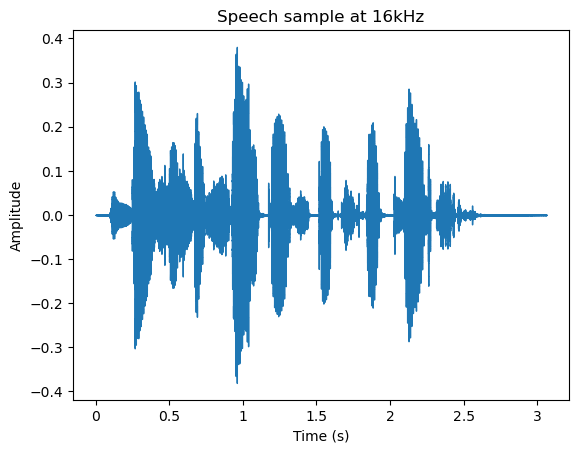

In [1]:
import IPython
import librosa
import librosa.display
import matplotlib.pyplot as plt


# Read audio files
audio_48k, _ = librosa.load("sounds/sample-speech-48k.wav", sr=48000)
audio_16k, _ = librosa.load("sounds/sample-speech-16k.wav", sr=16000)

# Display waveform of the speech sample recorded at 48kHz
librosa.display.waveshow(audio_48k, sr=48000)
plt.title("Speech sample at 48kHz")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()
IPython.display.display(IPython.display.Audio(audio_48k, rate=48000))

# Do the same for the file recorded at 16kHz
librosa.display.waveshow(audio_16k, sr=16000)
plt.title("Speech sample at 16kHz")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()
IPython.display.display(IPython.display.Audio(audio_16k, rate=16000))

It is possible to evidence that even when the waveform of both audio examples are very similar, the perceived sound is different due to the missing information in the case of the 16kHz recording. Even when the message can be understood in both cases, it lacks high frequency content, mainly affecting [plosives](https://en.wikipedia.org/wiki/Plosive) and [fricatives](https://en.wikipedia.org/wiki/Fricative).

Now, let's the compare the magnitude spectrogram of both recordings:

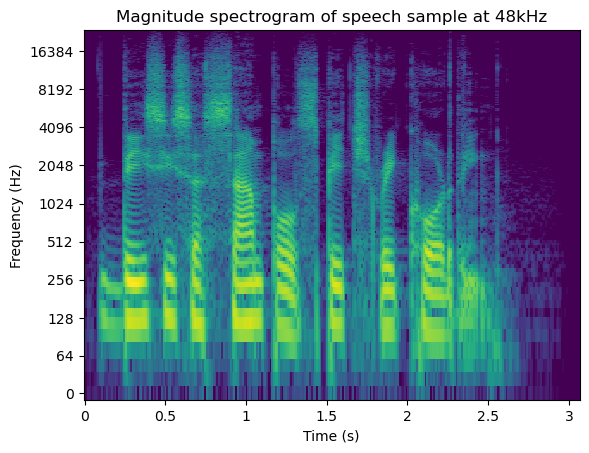

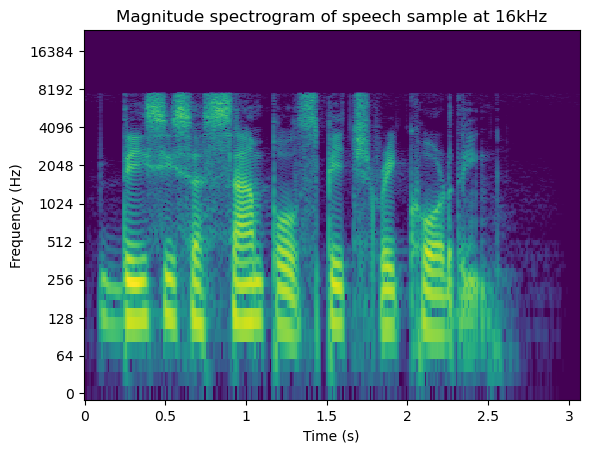

In [2]:
import numpy as np

# The 16k audio will be resampled to match the shape of the 48k audio
audio_16k_resampled = librosa.resample(audio_16k, orig_sr=16000, target_sr=48000)

# Calculate magnitude spectrogram of both audios
mag_spectrogram_16k = librosa.amplitude_to_db(np.abs(librosa.stft(audio_16k_resampled)), ref=np.max)
mag_spectrogram_48k = librosa.amplitude_to_db(np.abs(librosa.stft(audio_48k)), ref=np.max)

# Plot magnitude spectrogram of both audios
librosa.display.specshow(mag_spectrogram_48k, y_axis="log", x_axis="time", sr=48000, cmap="viridis")
plt.title("Magnitude spectrogram of speech sample at 48kHz")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()

librosa.display.specshow(mag_spectrogram_16k, y_axis="log", x_axis="time", sr=48000, cmap="viridis")
plt.title("Magnitude spectrogram of speech sample at 16kHz")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()

Now what was previously experienced by listening to the audio samples, can be corroborated by comparing the magnitude spectrogram plots. The audio at 16kHz lacks content above half of its sample frequency, which is what BWE will attempt to reconstruct.

# Applications

Professional studio recordings for music, films or podcasts will typically be recorded using sample rates of at least 44.1kHz (CD quality). However, other applications such as VoIP telephony target lower sample rates as a way of minimising the amount of data to be transmitted. For instance, bluetooth headphones using the [Hands-Free Profile](https://en.wikipedia.org/wiki/List_of_Bluetooth_profiles#Hands-Free_Profile_(HFP)) or [Headset Profile](https://en.wikipedia.org/wiki/List_of_Bluetooth_profiles#Headset_Profile_(HSP)) use sample rates such as 8kHz (known as **narrow band**) or 16kHz (known as **wide band**). For this reason, one of the main motivations behind BWE is to overcome the aforementioned limitations in order to deliver comparable quality without affecting the data rate. It is important to mention that succeeding in such objective would not only affect the perceived quality of speech, but may potentially impact downstream tasks such as [speaker recognition](../Recognition/Speaker_Recognition_and_Verification.md), [speech-to-text (STT) systems](../Speech_Synthesis.md) or automatic translation.  

![](attachments/bandwidth-extension/bluetooth-bwe-diagram.png)

During the last decades, deep learning based digital signal processing has demonstrated outstanding results in several tasks such as speech denoising {cite:p}`braun2020denoising`, speech synthesis {cite:p}`tan2021speechsynthesis` or voice conversion {cite:p}`huan2020vcsurvey`. Nevertheless, some solutions involve a significantly bigger amount of computations compared to previously proposed solutions, making them impractical for real time processing. An alternative to mitigate this problem, is to train the network to process the input at a lower sample rate than the expected output of a given application, and then to artificially extend the bandwidth of the resulting signal before sending it to the system output. Since the amount of computations of the majority of neural network layers grow in proportion to the input shape, processing an input of smaller size can greatly improve the overall efficiency of the system. This is specially important in mobile or edge devices where the computational resources are limited. Moreover, in some cases these devices are the only choice because of privacy reasons since an on-device deployment may help to avoid propagating sensitive information to cloud servers.

![](attachments/bandwidth-extension/postnet-bwe-diagram.png)

# Existing approaches
 As previously mentioned, BWE is an overdetermined problem in and of itself. Therefore, the proposed solutions tend to be domain-specific (i.e. speech signals only). Previous solutions proposed for speech coding attach side information extracted from the encoded signal to be used during the decoding process to extend the bandwidth of the resulting output. Other solutions did not rely on auxiliary information and attempted to estimate the spectral envelope instead.
State of the art solutions usually involve neural networks that estimate the spectral envelope, the waveform, or a combination of both. The main advantage of deep learning in BWE is related with the fact that the network will learn from the data itself, rather than process the input based on a prescribed set of rules.

## Time domain networks
One of the most straightforward data driven approaches is to directly use the low bandwidth signal $s_l$ as input to estimate the waveform of the high bandwidth signal $s_h$. Typical architectures suited for this work involve some form of convolutional neural network {cite:p}`hao2020timebwe` or recurrent neural network (gated recurrent units GRUs or long short-term memory network LSTMs) that are able to effectively learn the patterns encountered both short and long term dependencies in the input signal {cite:p}`ling2018timebwe`. The main drawback of this approach is that waveforms that look similar to each other do not necessarily sound similar (as experienced with the previously shown audio examples). This type of networks alone may lead to a resulting waveform that preserves the short time features of the original input, but its spectral content could be very different.

![](attachments/bandwidth-extension/time-based-bwe-diagram.png)

Typically, the input shape of these networks is the same as the expected output shape. In order to achieve this, the low bandwidth signal $s_l$ is first upsampled and then fed to the network. The upsampling technique may vary, but in all cases it will simply provide an interpolated version of the original signal to be fed to the network.

## Frequency domain networks
To address the perceptual relevance problem mentioned in the previous paragraph, one possible solution is to include a different representation of input the speech signal such as the Short-time Fourier Transform (STFT). In this case, the network will be trained to estimate the high bandwidth signal magnitude spectrum $\hat{S}_h$ based on the low bandwidth signal magnitude spectrum $S_l$. This will enforce similarity in the frequency content between the ground truth h $s_h$ and estimate $\hat{s}_h$. This yields to a perceptually similar output, but with some disadvantages:

- The effectiveness of the method will depend on the STFT parameters and therefore there will be a time-frequency trade off in which larger FFT sizes may lead to better frequency resolution but poorer time resolution. This may impact the perception of the transients present in the estimate $\hat{s}_h$ compared to the ground truth $s_h$.

- Usually, the phase of the estimate $\hat{s}_h$ is extended based on a prescribed set of rules such as copying and/or flipping the phase of the original signal $s_h$. Such reconstruction may lead to a waveform with artifacts. It is also important to mention that given a modified STFT (MSTFT), there may not exist a time domain signal whose STFT exactly matches the MSTFT, therefore even if the magnitude spectrogram estimate is optimal, the overall result could still be perceptually inadequate.

![](attachments/bandwidth-extension/frequency-based-bwe-diagram.png)

Some approaches are based on this idea but further elaborate by using representations such as mel spectrogram or [MFCCs](../Representations/Melcepstrum.ipynb) {cite:p}`wang2018freqbwe` {cite:p}`liu20015freqbwe` {cite:p}`gupta2019freqbwe`

## Mixed approaches
Due to the drawbacks mentioned on both time domain methods and frequency domain methods, one alternative is to combine the advantages of both to mitigate the individual problems each one has {cite:p}`lin2021mixbwe`. One way to do it is by cascading two networks: First, a frequency domain **network A** will produce a rough waveform estimate whose magnitude spectrum estimate $\hat{S}_h$ matches the magnitude spectrum of the ground truth $S_h$. Then, the second **network B** will help to refine transients and alleviate phasing issues. Since this method comprises two cascaded networks, it is expected that the total size and computational requirements increases if compared to any of the previous deep neural network methods. This may be unimportant for some offline use cases or cloud inferencing, however, it may be a deciding factor for real time applications and mobile on-device inferencing.

![](attachments/bandwidth-extension/mixed-bwe-diagram.png)

Other approaches utilize a parallel connection instead of cascading two networks {cite:p}`lim2018mixbwe`.

## Generative adversarial networks (GANs)
Generative adversarial networks have demonstrated significant success in several audio processing tasks {cite:p}`liu2020cpgan` {cite:p}`ferro2019cyclegan` {cite:p}`kong2020hifigan` including BWE {cite:p}`su2021bwegan` {cite:p}`liu2022bwegan` {cite:p}`li2020rtgan`. The main idea is that instead of using a single network, GANs correspond to a combination of at least two networks each one playing a different role. The **generator $G$** role is to generate examples $\hat{s}_h$ that should be as close as possible to the desired output $s_h$. The **discriminator $D$** act as a classifier that should distinguish between fake samples $\hat{s}_h$ and real samples $s_h$. Both networks should be alternately trained to obtain good results. If the **discriminator $D$** outperforms the **generator $G$**, then it will not be able to learn how to improve generating $\hat{s}_h$, causing the so-called [*vanishing gradients* problem](https://en.wikipedia.org/wiki/Vanishing_gradient_problem). 
Conversely, if the **generator $G$** outperforms the **discriminator $D$**, it may lead to [*mode collapse*](https://wandb.ai/authors/DCGAN-ndb-test/reports/Measuring-Mode-Collapse-in-GANs--VmlldzoxNzg5MDk), meaning that the **generator $G$** will only generate a handful of examples that are known to fool the **discriminator $D$**. This is not desirable since the end goal is to produce a **generator $G$** that can ideally generalise to any speech input signal $s_l$.

![](attachments/bandwidth-extension/gan-generator-training-diagram.png)

When the **generator $G$** is trained, the **discriminator $D$** weights will be frozen. $G$ will first generate a prediction and the $D$ will classify this prediction as real or fake. $G$ will then update its gradients to gradually generate better predictions that $D$ will not able to distinguish from real fullbandwidth audios.

![](attachments/bandwidth-extension/gan-discriminator-training-diagram.png)

Then, the **generator $G$** weights are frozen and it will be used to generate the fake examples, namely, examples whose bandwidth has been artificially extended. A combination of fake examples and real examples (ground truth audios) will be fed to the **discriminator $D$** along with their respective labels. This will help to compare the results obtained by $D$ classifying both types of samples against the expected output.

If the GAN system successfully converges, then the next step is to disconnect the **discriminator $D$** and only use the **generator $G$** for inference. This provides the advantage of getting rid of the computational burden caused by the **discriminator $D$** during inference. Additionally, some configurations may involve multiple discriminators, for example, each one using a STFT with different FFT size and hop size. Overall, GANs are still an active area of research and many implementation details are fine-tuned by trial and error on a case-by-case basis.

# Evaluation
Even when there are widely used metrics for automatic speech quality assessment such as [Perceptual Evaluation of Speech Quality (PESQ)](https://en.wikipedia.org/wiki/Perceptual_Evaluation_of_Speech_Quality) or [Virtual Speech Quality Objective Listener (ViSQOL)](https://arxiv.org/abs/2004.09584), they usually require narrow band or wide band inputs to compute the score. For the case of BWE, doing so would defeat the purpose if the goal is to produce a signal whose sample rate is greater than those. For these reasons, automatic quality assessment for fullband speech is an active reseach topic. Mean Opinion Score (MOS) based on subjective evaluation continues to be the *gold standard* to choose the best candidate for a given tasks, yet this process is deemed as expensive and time-consuming. Moreover, if **paper A** publishes results that later on **paper B** claims to outperform by a marginal MOS score, it may be debatable without having further information about the details of the process, the number of subjects or any additional conditions that may help to achieve a fair comparison between both evaluations.

The following metrics are the most commonly reported among BWE researchers at the moment of writing this material:

## Log spectral distance (LSD)
Log spectral distance is a frequency domain metric that measures the logarithmic distance between two spectra. Since it is based on the magnitude spectrum, it will not take into account the correctness of the phase reconstruction:

$\text{LSD}\left(S_h, \hat{S}_h\right)=\frac{1}{M}\sum\limits_{m=0}^{M-1}\sqrt{\frac{1}{K}\sum\limits_{k=0}^{K-1}\left(\text{log}_{10}\frac{\hat{S}_{h}\left(m, k\right)^2}{S_{h}\left(m, k\right)^2}\right)^2}$


Where $\hat{S}_h$ and $S_h$ are the magnitude spectrogram of the estimate and ground truth signals, respectively. Some variations of this metric will include only the reconstructed portion of the spectra. In such case, this metric can be found in literature as **LSD-HF**. For example, if the bandwidth of the signal is extended from 16kHz to 32kHz, **LSD-HF** will only consider FFT bins representing frequencies above 8kHz.

## SNR
Signal-to-noise ratio (SNR) provides a logarithmic time domain comparison, but between the ground truth $s_h$ and the difference between the ground truth $s_h$ and the estimate $\hat{s}_h$:

$\text{SNR}\left(\hat{s}_h, s_h\right) = 10\text{log}_{10}\frac{\sum_{n=0}^{N-1}s_h[n]^2}{\sum_{n=0}^{N-1}\left(\hat{s}_h[n]-s_h[n]\right)^2}$

## SI-SDR
Scale-invariant signal-to-distortion ratio (SI-SDR) {cite:p}`roux2018sisdr` provides and improved version of signal-to-distortion ratio (SDR) and similarly to SNR, corresponds to a logarithmic time domain comparison between the estimate $\hat{s}_h$ and the ground truth $s_h$:

$\text{SI-SDR}=10\text{log}_{10}\left(\frac{\lVert e_{\text{target}}\rVert^2}{\lVert e_{\text{res}}\rVert^2}\right)$

Where:  

$e_{\text{target}}=\frac{\hat{s}_h^T s_h}{\lVert s_h\rVert^2}s_h$ and $e_{\text{res}}=\hat{s}_h-e_{\text{target}}$

## Mean Opinion Score (MOS)

Mean Opinion Score (MOS) is a subjective measure used typically in - but not limited to - telecommunications engineering that represents the overall quality of a system. In the case of bandwidth extension, a trained listener would assess the resulting quality of a recording whose bandwidth has been artificially extended. [ITU-T P.800.1](https://www.itu.int/rec/T-REC-P.800.1-201607-I/es) defines different uses of this score. It is a single integer number in the range of 1 to 5, where the lowest quality is 1 and the highest perceived quality is 5. If various listeners have evaluated a single algorithm, the final MOS would be the arithmetic mean over all the evaluation scores and could therefore produce a non-integer value when averaged.

# References
```{bibliography}
:filter: docname in docnames
```